# FFT of A Squre Pulse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift


In [2]:

# 定義參數
T = 1  # 脈衝寬度
N = 1024  # 取樣點數
t_max = 5  # 時間範圍
dt = 2 * t_max / N  # 取樣間隔
t = np.linspace(-t_max, t_max, N, endpoint=False)  # 時間軸

# 定義方形脈衝
square_pulse = np.where(np.abs(t) <= T/2, 1, 0)

# 計算傅立葉變換
freq = fftfreq(N, dt)  # 頻率軸
fft_result = fft(square_pulse)  # FFT
fft_result_shifted = fftshift(fft_result)  # 使頻譜對稱
freq_shifted = fftshift(freq)  # 使頻率對稱

# 理論 sinc 函數
sinc_theory = T * np.sinc(freq_shifted * T)


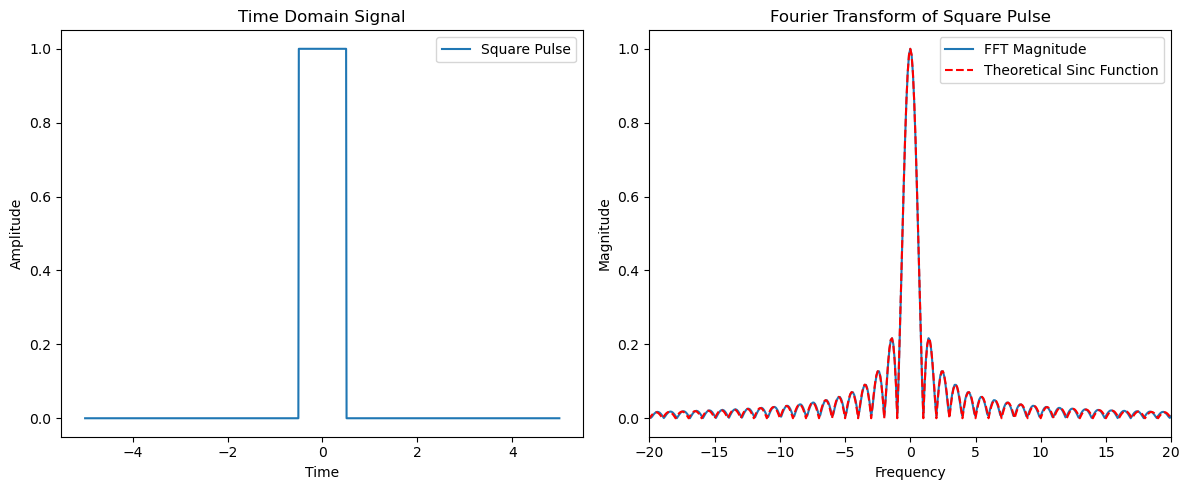

In [3]:

# 繪製時域訊號
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, square_pulse, label="Square Pulse")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal")
#plt.grid()
plt.legend()

# 繪製 FFT 結果
plt.subplot(1, 2, 2)
plt.plot(freq_shifted, np.abs(fft_result_shifted) / np.max(np.abs(fft_result_shifted)), label="FFT Magnitude")
plt.plot(freq_shifted, np.abs(sinc_theory) / np.max(np.abs(sinc_theory)), 'r--', label="Theoretical Sinc Function")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of Square Pulse")
#plt.grid()
plt.legend()
plt.xlim((-20, 20))

plt.tight_layout()
plt.show()